In [1]:
from matplotlib import pyplot as plt
import pandas as pd

In [129]:
df = pd.read_csv("C:\\Users\\Kruspe\\rawData_Dominic.csv")
df.head(6)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v992,v993,v994,v995,v996,v997,v998,v999,v1000,label
0,164,164,164,164,260,260,260,260,260,260,...,213,213,213,213,213,213,213,213,213,left
1,-78,-78,-78,-78,-78,-78,-78,-78,83,-81,...,163,163,163,163,163,163,163,163,163,left
2,-10,-10,-10,-42,-42,-42,-42,-42,-42,-42,...,115,115,115,84,84,84,84,84,84,left
3,173,173,173,173,173,173,173,173,173,20,...,-88,-88,-88,-88,-88,-88,-88,151,151,left
4,5,5,5,5,-7,-7,-7,-7,-7,-7,...,-82,-82,-82,140,140,140,140,140,140,left
5,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,...,26,26,26,26,26,26,26,26,26,left


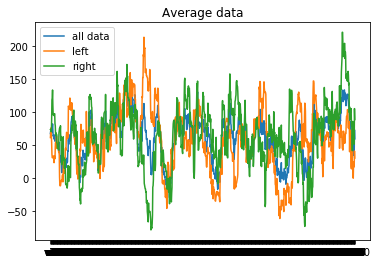

In [130]:
rdf = df.drop(['label'], axis=1)
lrdf = rdf[df.label=='left']
rrdf = rdf[df.label=='right']
rdfm = rdf.mean(axis=0)
lrdfm = lrdf.mean(axis=0)
rrdfm = rrdf.mean(axis=0)
plt.plot(rdfm, label="all data") 
plt.plot(lrdfm, label="left") 
plt.plot(rrdfm, label="right") 
plt.legend()
plt.title("Average data")
plt.show() 

In [131]:
import numpy as np

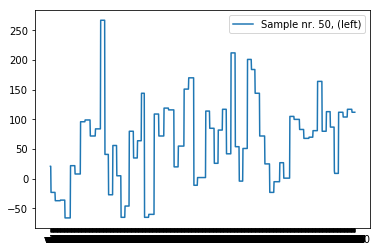

In [209]:
x = np.array([])
input1 = rdf.iloc[50]
v = "Sample nr. 50, (%s)" % (df.iloc[50].label)
plt.plot(input1, label=v)
plt.legend()
plt.show()

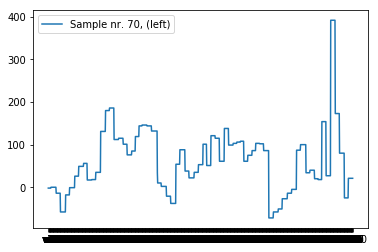

In [210]:
x = np.array([])
input2 = rdf.iloc[70]
v = "Sample nr. 70, (%s)" % (df.iloc[70].label)
plt.plot(input2, label=v)
plt.legend()
plt.show()

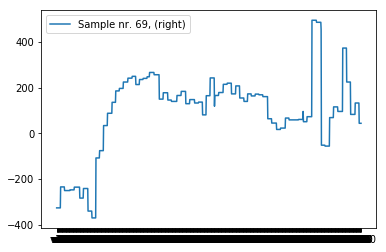

(1000,)


In [211]:
input3 = rdf.iloc[69]
v = "Sample nr. 69, (%s)" % (df.iloc[69].label)
plt.plot(input3, label=v)
plt.legend()
plt.show()
print (input2.shape)

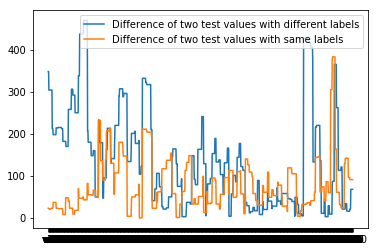

In [248]:
diff = input1-input3
diff2 = input1-input2
plt.plot(np.absolute(diff), label="Difference of two test values with different labels")
plt.plot(np.absolute(diff2), label="Difference of two test values with same labels")
plt.legend()
plt.show()

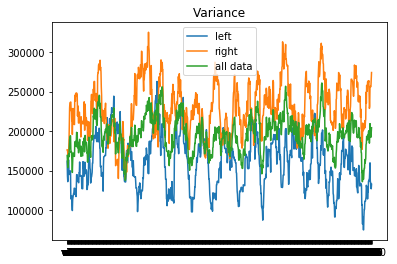

In [198]:
plt.plot(np.var(lrdf, axis=0), label="left")
plt.plot(np.var(rrdf, axis=0), label="right")
plt.plot(np.var(rdf, axis=0), label="all data")
plt.legend()
plt.title("Variance")
plt.show()

In [199]:
for e in input:
    x = np.append(x, int(e))
    
print (x.shape)

(1000,)


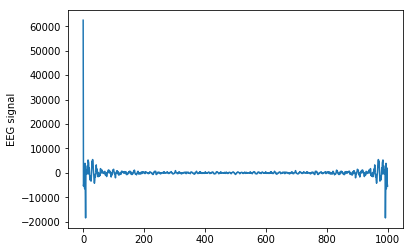

In [200]:
ff = np.fft.fft(x)
plt.plot(ff)
plt.ylabel('EEG signal')
plt.show()

In [201]:
import pywt
coeffs = pywt.wavedec(x, 'db4', level=6)
cA2,cD1,cD2,cD3,cD4,cD5,cD6 = coeffs

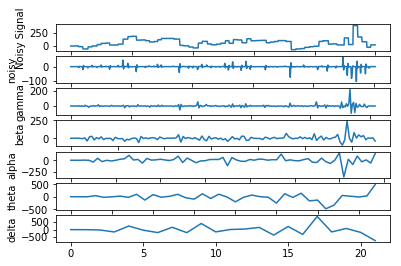

In [202]:
plt.subplot(7, 1, 1)
plt.plot(x)
plt.ylabel('Noisy Signal')
plt.subplot(7, 1, 2)
plt.plot(cD6)
plt.ylabel('noisy')
plt.subplot(7,1,3)
plt.plot(cD5)
plt.ylabel("gamma")
plt.subplot(7,1,4)
plt.plot(cD4)
plt.ylabel("beta")
plt.subplot(7,1,5)
plt.plot(cD3)
plt.ylabel("alpha")
plt.subplot(7,1,6)
plt.plot(cD2)
plt.ylabel("theta")
plt.subplot(7,1,7)
plt.plot(cD1)
plt.ylabel("delta")
plt.draw()
plt.show()

In [203]:
## Standard Deviation

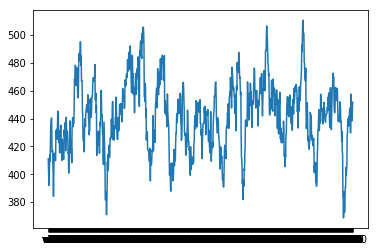

In [204]:
plt.plot(np.std(rdf, axis=0))

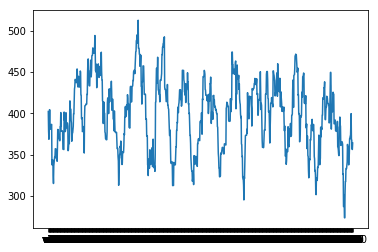

In [205]:
plt.plot(np.std(rdf[df.label=='left'], axis=0))

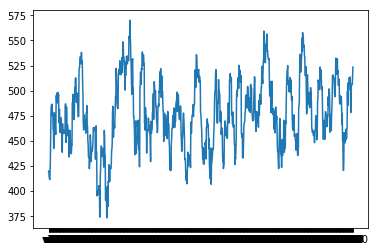

In [206]:
plt.plot(np.std(rdf[df.label=='right'], axis=0))

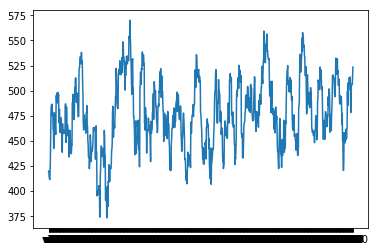

In [207]:
plt.plot(np.std(rrdf, axis=0))

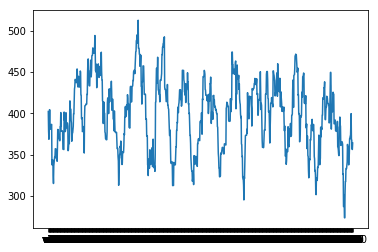

In [208]:
plt.plot(np.std(lrdf, axis=0))

In [68]:
##Fast Fourier Transform

In [137]:
tfc, tfv = rdf.shape
matrix = rdf.to_numpy()

In [138]:
ff = np.zeros(shape=(tfc,tfv), dtype=complex)
c = 0;
for f in matrix:
    x = np.array([])
    for e in f:
        x = np.append(x, int(e))
    ff[c] = np.fft.fft(x)
    c = c+1

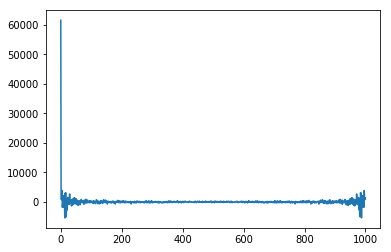

In [139]:
ffm = ff.mean(axis=0)
plt.plot(ffm) 
plt.show() 

In [140]:
##WaveDecomposition

In [141]:
cA2a = np.empty(shape=(tfc,22), dtype=complex)
cD1a = np.empty(shape=(tfc,22), dtype=complex)
cD2a = np.empty(shape=(tfc,38), dtype=complex)
cD3a = np.empty(shape=(tfc,69), dtype=complex)
cD4a = np.empty(shape=(tfc,131), dtype=complex)
cD5a = np.empty(shape=(tfc,255), dtype=complex)
cD6a = np.empty(shape=(tfc,503), dtype=complex)
i = 0;
for w in ff:
    coeffs = pywt.wavedec(w, 'db4', level=6)
    cA2,cD1,cD2,cD3,cD4,cD5,cD6 = coeffs
    cA2a[i] = cD1
    cD1a[i] = cA2
    cD2a[i] = cD2
    cD3a[i] = cD3
    cD4a[i] = cD4
    cD5a[i] = cD5
    cD6a[i] = cD6
    i = i+1
#ca = np.append(ca, coeffs)
#ca = np.append(ca, coeffs)
#for wd in ff:
    #coeffs = pywt.wavedec(x, 'db4', level=6)
    #cA2,cD1,cD2,cD3,cD4,cD5,cD6 = coeffs

In [142]:
print (cA2.shape,cD1.shape,cD2.shape,cD3.shape,cD4.shape,cD5.shape, cD6.shape)

(22,) (22,) (38,) (69,) (131,) (255,) (503,)


In [143]:
##Average Channel Values

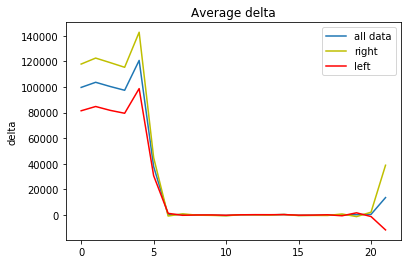

In [144]:
cD1am = cD1a.mean(axis=0)
cD1aml = cD1a[df.label=="left"].mean(axis=0)
cD1amr = cD1a[df.label=="right"].mean(axis=0)
plt.plot(cD1am, label="all data") 
plt.plot(cD1amr, 'y', label="right") 
plt.plot(cD1aml, 'r', label="left") 
plt.ylabel("delta")
plt.legend()
plt.title("Average delta")
plt.show() 

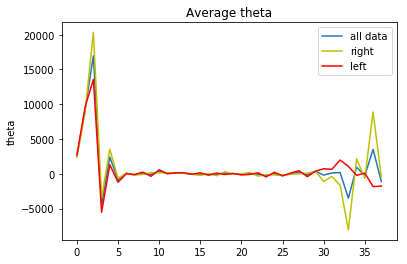

In [145]:
cD2am = cD2a.mean(axis=0)
cD2aml = cD2a[df.label=="left"].mean(axis=0)
cD2amr = cD2a[df.label=="right"].mean(axis=0)
plt.plot(cD2am, label="all data") 
plt.plot(cD2amr, 'y', label="right") 
plt.plot(cD2aml, 'r', label="left") 
plt.ylabel("theta")
plt.legend()
plt.title("Average theta")
plt.show() 

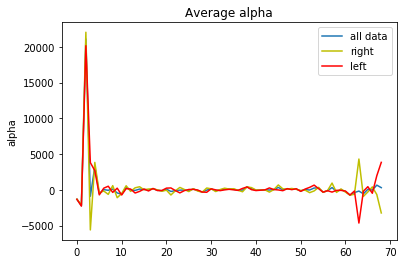

In [146]:
cD3am = cD3a.mean(axis=0)
cD3aml = cD3a[df.label=="left"].mean(axis=0)
cD3amr = cD3a[df.label=="right"].mean(axis=0)
plt.plot(cD3am, label="all data") 
plt.plot(cD3amr, 'y', label="right") 
plt.plot(cD3aml, 'r', label="left") 
plt.ylabel("alpha")
plt.legend()
plt.title("Average alpha")
plt.show() 

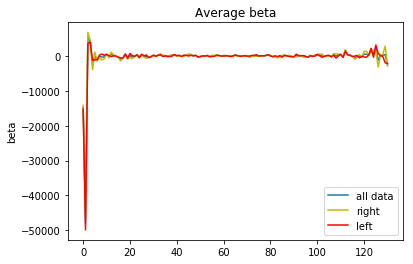

In [147]:
cD4am = cD4a.mean(axis=0)
cD4aml = cD4a[df.label=="left"].mean(axis=0)
cD4amr = cD4a[df.label=="right"].mean(axis=0)
plt.plot(cD4am, label="all data") 
plt.plot(cD4amr, 'y', label="right") 
plt.plot(cD4aml, 'r', label="left") 
plt.ylabel("beta")
plt.legend()
plt.title("Average beta")
plt.show() 

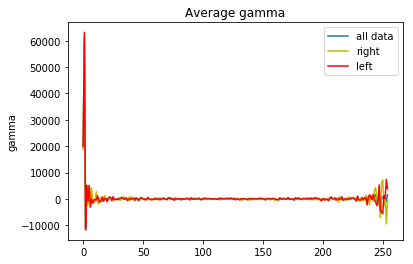

In [148]:
cD5am = cD5a.mean(axis=0)
cD5aml = cD5a[df.label=="left"].mean(axis=0)
cD5amr = cD5a[df.label=="right"].mean(axis=0)
plt.plot(cD5am, label="all data") 
plt.plot(cD5amr, 'y', label="right") 
plt.plot(cD5aml, 'r', label="left") 
plt.ylabel("gamma")
plt.legend()
plt.title("Average gamma")
plt.show() 

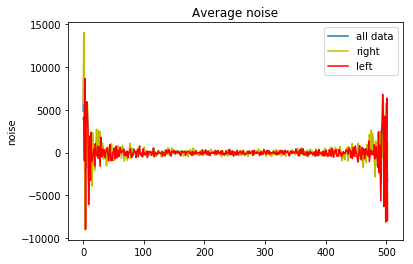

In [149]:
cD6am = cD6a.mean(axis=0)
cD6aml = cD6a[df.label=="left"].mean(axis=0)
cD6amr = cD6a[df.label=="right"].mean(axis=0)
plt.plot(cD6am, label="all data") 
plt.plot(cD6amr, 'y', label="right") 
plt.plot(cD6aml, 'r', label="left") 
plt.ylabel("noise")
plt.legend()
plt.title("Average noise")
plt.show() 

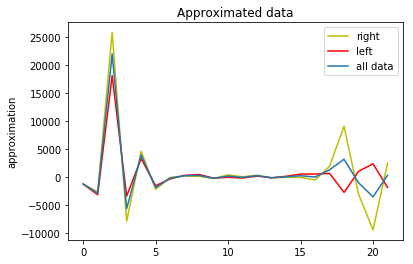

In [150]:
cA2am = cA2a.mean(axis=0)
cA2aml = cA2a[df.label=="left"].mean(axis=0)
cA2amr = cA2a[df.label=="right"].mean(axis=0)
plt.plot(cA2amr, 'y', label="right") 
plt.plot(cA2aml, 'r', label="left") 
plt.plot(cA2am, label="all data") 
plt.ylabel("approximation")
plt.legend()
plt.title("Approximated data")
plt.show() 

In [151]:
test_data = cA2a[:,17:]

In [84]:
test_data.shape

(250, 5)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [50]:
scaled_test_data = scaler.fit(test_data)

ValueError: Complex data not supported
[[  1100.73577015-2.68478152e+03j   6233.65568235-8.28123398e+03j
   -2135.04403895+2.67294417e+03j  -6405.5746871 +9.11862553e+03j
    1726.60570448-1.38468428e+03j]
 [  4412.14198206-5.17102886e+02j  17879.47421906-6.29938980e+03j
   -6001.84721016+2.21362499e+03j -18971.35523655+6.22239769e+03j
    4028.86222191-2.26355484e+03j]
 [  -110.47213406-3.90203731e+03j   1044.2666586 -1.09054657e+04j
    -375.82277894+3.44721722e+03j   -908.90928014+1.21814877e+04j
     478.85369298-1.41106049e+03j]
 [  -413.98614286+2.70975481e+03j  -3686.1722118 +5.35389507e+03j
    1263.09028634-1.62181182e+03j   3711.30316362-6.31811729e+03j
   -1277.58029944+4.54905215e+01j]
 [   309.92092076-4.25780951e+03j   2219.05256527-1.09828546e+04j
    -770.11635464+3.53692017e+03j  -2237.31349411+1.22994439e+04j
     577.75850291-1.09000083e+03j]
 [   955.44355787-1.14441310e+00j   6188.48670607-2.41670495e+03j
   -2048.17168595+9.25635712e+02j  -6333.83803803+2.21834883e+03j
    1738.51684983-1.05241564e+03j]
 [  3316.94503838+1.93600812e+03j  10236.08207863+7.04628659e+03j
   -3397.3151506 -2.35400635e+03j -11150.45516622-7.57667382e+03j
    1460.34243623+1.40383617e+03j]
 [  2261.84803498-1.01074383e+03j   8580.10372778-3.79881831e+03j
   -2876.32875632+1.28442515e+03j  -9165.46734867+4.04314487e+03j
    1806.93014111-7.55727204e+02j]
 [  1409.54500137+1.45722394e+03j   3430.4265074 +4.50096258e+03j
   -1095.0440194 -1.51581713e+03j  -3912.27098489-4.89494149e+03j
     351.71045895+6.62630293e+02j]
 [ -4048.91542117+1.63693704e+03j -15956.39401921+4.94482646e+03j
    5351.32835626-1.67540986e+03j  16973.35655827-5.38923475e+03j
   -3534.73826189+7.66842750e+02j]
 [ -4126.10814382-1.47617507e+03j -18754.96131413-6.68713236e+03j
    6344.22874527+2.24199351e+03j  19662.28854235+7.02757496e+03j
   -4575.13423503-1.63375281e+03j]
 [ -3131.43338882-2.07853638e+03j  -4384.36263663-1.39684747e+03j
    1331.44696436+5.21855499e+02j   5480.23811936+2.06472615e+03j
     477.27125597+1.32823103e+03j]
 [  -657.90382558-6.35280751e+02j    564.30963069-1.22803425e+03j
    -243.69094356+3.05132593e+02j   -266.99483062+1.51760872e+03j
     753.8679443 -6.55692921e+01j]
 [  1225.87422729+2.32271305e+03j   5934.51981898+1.23368356e+04j
   -1996.84763696-4.25381395e+03j  -6191.32256294-1.27429789e+04j
    1530.45724877+3.34348641e+03j]
 [   559.34097453+3.15007837e+02j    632.9070261 +7.53655800e+02j
    -168.03831839-2.31609184e+02j   -879.9452922 -8.67926227e+02j
    -162.13027034+6.90932670e+01j]
 [   177.77057245-2.51854677e+03j   2410.10295779-6.53433662e+03j
    -834.47169363+2.13505834e+03j  -2399.24036553+7.30885827e+03j
     843.26374785-6.87795830e+02j]
 [  -593.53147604-2.19216780e+03j  -4125.29335045-1.22755489e+04j
    1339.27986216+4.22530313e+03j   4264.19218096+1.25871482e+04j
   -1186.03500687-3.36844399e+03j]
 [  -737.87741739+4.48096315e+02j   -753.40773853-9.35206755e+02j
     205.13443587+3.46995172e+02j   1051.72533049+7.42299722e+02j
     210.98773965-8.87432101e+02j]
 [ -2186.86433562-3.58452989e+02j -11726.5044378 +3.46781674e+03j
    3862.57699629-1.29098367e+03j  12221.3929245 -3.07275124e+03j
   -3047.43366397+1.69832041e+03j]
 [  -126.64250984-2.19174615e+03j   1221.88039046-1.07905984e+04j
    -419.81289145+3.62942776e+03j  -1137.02176284+1.12730722e+04j
     643.82017976-2.81888199e+03j]
 [    97.23497647-4.37470522e+03j   7107.99368599-1.56006031e+04j
   -2429.50954437+5.24302315e+03j  -6925.47107927+1.67640172e+04j
    3059.01145004-2.92297665e+03j]
 [  -359.72012925+2.90313594e+03j   -600.48290019+6.87900677e+03j
     251.04407965-2.08188863e+03j    674.17289511-7.95755559e+03j
     -29.83472148+4.50872754e+02j]
 [  3986.17453236+3.08958452e+03j   6391.70762357+1.34721692e+04j
   -2055.93782389-4.44354622e+03j  -7689.69446448-1.42281265e+04j
    -787.60736971+3.49677341e+03j]
 [  2662.83845127+1.34648747e+02j  11564.42913243-4.86667998e+03j
   -3884.56053113+1.81100471e+03j -12200.12176313+4.54198819e+03j
    2721.27617786-2.19351677e+03j]
 [ -4126.43436115-2.76390005e+03j  -7381.08626966-8.29457016e+03j
    2400.11582196+2.66793094e+03j   8702.73720881+9.07534603e+03j
     711.87992962-1.36332001e+03j]
 [  3868.69532365-1.38783919e+03j  16290.34436506-1.27195586e+04j
   -5498.18526834+4.51454931e+03j -17203.88746787+1.26618808e+04j
    3736.1888972 -4.26360213e+03j]
 [   772.26710871-8.02958102e+02j   2847.57780805-5.86198826e+02j
    -988.87875892+8.88780022e+01j  -3013.81188273+9.52204631e+02j
     455.7045112 +3.84104363e+02j]
 [   955.47190006+8.34849725e+02j  11652.77044165+7.91775515e+03j
   -4013.78464081-2.74064056e+03j -11581.46190989-7.97913551e+03j
    4427.39072299+2.83809569e+03j]
 [ -1258.65729161+3.47265249e+03j  -3986.47873954+4.59013815e+03j
    1330.77279862-1.28038567e+03j   4336.45979921-5.89992871e+03j
    -572.00870272-1.00680242e+03j]
 [  3253.49706626+6.42602886e+02j  15643.55655717+6.74665158e+03j
   -5273.97404887-2.38288586e+03j -16362.90534201-6.69838947e+03j
    4070.64158826+2.36002100e+03j]
 [ -1293.05920316-1.61244537e+03j  -5967.95060459-3.96050530e+03j
    2025.8345666 +1.29343142e+03j   6215.25145108+4.44459739e+03j
   -1384.31516733-3.34773804e+02j]
 [ -1155.13556869-1.44903126e+03j  -5202.24623477-8.50065498e+03j
    1755.74817491+2.94567470e+03j   5468.87080242+8.71052362e+03j
   -1268.0335191 -2.41866692e+03j]
 [   568.64630047+2.78507542e+03j   1610.12358037+1.01792196e+04j
    -511.70509314-3.41370226e+03j  -1789.07868974-1.09146421e+04j
     147.17945503+2.15821275e+03j]
 [  2293.84366263-8.13314422e+02j  -1152.09371731-3.97600501e+02j
     497.52232153+9.12109731e+01j    214.19012473+6.96129150e+02j
   -2795.68839619+6.67406969e+02j]
 [   439.05407159-1.88061186e+03j    369.96200492-6.74160894e+03j
     -81.72793584+2.29037929e+03j   -574.63025285+7.18378860e+03j
    -115.28044159-1.23891470e+03j]
 [  -471.67740493+3.48444009e+03j  -1653.67047059+1.24278250e+04j
     509.29434328-4.07082366e+03j   1854.60141214-1.34223373e+04j
    -400.11864763+2.45419708e+03j]
 [   863.66251356+7.77504787e+02j   3807.16874389+5.65164163e+03j
   -1291.37616813-1.99084768e+03j  -3986.68988804-5.70157121e+03j
     937.64737316+1.74353504e+03j]
 [    25.80474908+8.94550308e+02j  -1079.51584751-2.05909303e+02j
     323.20602631+1.34937586e+02j   1120.14725778-1.49307948e+02j
    -631.86226461-8.33214058e+02j]
 [ -1871.16263837-9.07239535e+02j  -6909.13638954+4.62843001e+01j
    2307.35240423-1.35466492e+02j   7406.38158375+3.75745836e+02j
   -1416.75735772+7.72698724e+02j]
 [   614.23104167-1.70991176e+03j   2089.62713268-5.87171513e+03j
    -710.23609161+1.92868675e+03j  -2242.74915218+6.34911488e+03j
     356.53833144-1.07902550e+03j]
 [   -37.89366537+2.43613941e+03j   -525.69175617+9.41991470e+03j
     159.59383482-3.14312671e+03j    517.28897542-1.00223679e+04j
     -79.57548078+2.00393398e+03j]
 [ -2559.4615437 -1.37424904e+03j  -3973.89637141-2.23178600e+02j
    1260.81866001+1.15066293e+01j   4854.0290999 +7.03263332e+02j
     622.69058739+1.39242545e+03j]
 [  1384.54562851+1.46323629e+03j   9697.48583959-7.06211013e+02j
   -3154.80072028+4.03824560e+02j  -9980.93515233-5.29880819e+01j
    2842.17395303-1.43563836e+03j]
 [  1160.75897893+3.13396355e+03j   4677.66788812+7.99699288e+03j
   -1592.70922564-2.56118855e+03j  -4927.13827511-8.99507484e+03j
     951.54882089+8.32203338e+02j]
 [  2920.02953801-7.17182740e+02j  10524.11441356+5.33418380e+03j
   -3671.40184833-2.04001882e+03j -11205.18528588-4.64189482e+03j
    2303.83528115+2.75319836e+03j]
 [  1468.6308462 +1.93824383e+03j   1685.85859835+1.87692692e+03j
    -576.46698856-6.66336321e+02j  -2143.32070489-2.51440706e+03j
    -514.06357111-8.52349116e+02j]
 [  1840.87083665+2.09993341e+03j   8329.38394966+7.28955382e+03j
   -2798.32529914-2.30721331e+03j  -8759.57683505-7.95344997e+03j
    2129.94527215+1.50030668e+03j]
 [ -1965.13161016+3.47812736e+02j  -7367.72014428+5.83443629e+03j
    2461.78323711-2.11480779e+03j   7896.35857408-5.64964394e+03j
   -1560.29314029+2.07875907e+03j]
 [  2045.39492931-2.05854849e+03j  10151.43908284-4.69819724e+03j
   -3462.74018266+1.49619492e+03j -10584.91845361+5.41615374e+03j
    2707.46402079-4.98582461e+02j]
 [ -1594.24680638+2.27648835e+03j     65.98514245+5.32297167e+03j
     -96.77258636-1.72774619e+03j    574.31354003-5.94824788e+03j
    1613.04851785+1.90411567e+02j]
 [ -1538.94693132+9.75109522e+02j  -6284.51867177+6.67576796e+03j
    2064.84967569-2.34320391e+03j   6719.68782519-6.75774958e+03j
   -1439.13874639+2.05426457e+03j]
 [ -2127.97433452+2.02909400e+03j  -7786.45616069+2.39524988e+03j
    2560.52079543-7.09876219e+02j   8362.69470098-3.13213631e+03j
   -1556.05003181-6.30784651e+02j]
 [  4162.81236161-2.11755319e+03j  13903.74815396-6.91441183e+03j
   -4595.80535342+2.22429591e+03j -15057.56737522+7.56941671e+03j
    2334.94851275-1.02207337e+03j]
 [  1922.67400402+4.92661350e+01j   9163.44956149-5.63388326e+03j
   -3084.84927714+2.10083521e+03j  -9578.22512657+5.28181974e+03j
    2320.25380007-2.45504163e+03j]
 [ -1866.14309402-5.99148732e+03j   -229.00199721-1.41079445e+04j
     -40.17966586+4.56362021e+03j   1005.81888801+1.59164704e+04j
    1430.88910187-4.80765298e+02j]
 [  2115.80911296-3.39666908e+03j   5955.18688022-1.29976296e+04j
   -1978.89462349+4.30779521e+03j  -6561.91226775+1.39266110e+04j
     657.09406848-2.74181192e+03j]
 [ -2383.02448641+4.59286842e+02j  -9692.48483837+4.51692847e+02j
    3212.50670314-9.93848304e+01j  10351.13599745-6.52401902e+02j
   -2223.09843643-1.93368749e+02j]
 [   681.55707887+4.21947514e+02j  11499.12896833-2.82409552e+03j
   -3998.18533409+9.55205363e+02j -11290.96168914+2.60596317e+03j
    4299.05895717-1.90161408e+03j]
 [ -1465.5050057 -2.11410196e+02j  -6058.52516037+8.41935097e+02j
    2038.45364599-3.70002183e+02j   6414.37055458-6.73691399e+02j
   -1377.39480111+5.41844196e+02j]
 [ -3014.77504994-1.86146691e+03j  -8718.0819226 -8.07307009e+03j
    2940.8745999 +2.78492705e+03j   9541.03438322+8.48626734e+03j
   -1019.32436609-2.03932821e+03j]
 [  4363.04544992-1.29053761e+03j  15746.43577675-3.38816619e+03j
   -5250.9051385 +1.12855343e+03j -16927.80465328+3.74917553e+03j
    3165.58001526-2.31763838e+02j]
 [  2190.28521803-2.21797157e+03j   7448.22917076-1.03967071e+04j
   -2488.85515218+3.46686355e+03j  -8103.316277  +1.09298546e+04j
    1426.18604419-2.57589590e+03j]
 [  2115.79540099-5.07883431e+02j  12449.64643871-1.14751859e+04j
   -4331.01558512+4.02103916e+03j -12714.86951439+1.11792411e+04j
    3503.90546705-4.29388259e+03j]
 [  1822.53119191+2.62197913e+03j  12168.65447527+1.84926777e+04j
   -4136.84371687-6.40953852e+03j -12450.29512413-1.87852136e+04j
    3877.96669643+5.78978418e+03j]
 [  -878.87743563+1.10298087e+03j  -4216.3750274 +6.97712373e+03j
    1406.7282035 -2.44574144e+03j   4391.19785938-7.09130090e+03j
   -1051.7638792 +2.09079908e+03j]
 [  5232.90370745-8.62260591e+02j  18286.73854209+5.48152695e+02j
   -6075.58177787-3.18814882e+02j -19746.72946144-9.51883407e+01j
    3381.78192337+9.17966404e+02j]
 [   108.92725165+3.40819196e+03j  -1509.59427145+1.46912571e+04j
     547.45656337-4.86352972e+03j   1374.22311301-1.55976209e+04j
    -788.15638288+3.62728262e+03j]
 [   304.22747257+2.64366538e+03j   3224.2253623 +6.37214076e+03j
   -1143.61056366-2.08198463e+03j  -3199.50984858-7.20291328e+03j
    1166.49646736+6.02424792e+02j]
 [  -552.18628646+4.33008081e+03j     82.83825178+1.80468805e+04j
      34.93108868-6.03158251e+03j     81.89305327-1.91510496e+04j
     487.24301705+4.09607026e+03j]
 [  1052.78726981+3.52581621e+02j    404.62477229-3.42772954e+03j
     -47.68964447+1.29280343e+03j   -848.09046833+3.08559261e+03j
    -550.24715734-1.67008925e+03j]
 [  2712.45037335-1.23562266e+03j  13367.95076892-1.04614455e+04j
   -4503.69278618+3.56424558e+03j -13962.03134812+1.05689174e+04j
    3440.52569789-3.42685035e+03j]
 [  1652.29996094-3.60149825e+03j   7765.24371177-1.23786535e+04j
   -2616.94480751+4.10622580e+03j  -8119.34342835+1.33719209e+04j
    1895.37630706-2.32747155e+03j]
 [  -946.47522823+1.60557322e+03j  -1662.37722154+3.00803379e+03j
     514.56460341-9.48321577e+02j   2013.6209211 -3.52699939e+03j
      89.11601729-2.60541378e+02j]
 [  2667.311477  +1.19219431e+03j   8379.5521251 +2.67662441e+03j
   -2735.19149712-9.70875828e+02j  -9173.94646066-2.97407091e+03j
    1505.94950571+1.93944444e+02j]
 [  3124.34786839+2.72127183e+03j  13520.91537889+1.56359272e+04j
   -4470.77285782-5.30476903e+03j -14342.59067292-1.61090963e+04j
    3161.59903768+4.33421269e+03j]
 [    78.55995039-1.68049856e+03j  -1106.22138436+1.21916840e+03j
     393.1644196 -6.59342764e+02j   1023.4313541 -3.73137011e+02j
    -520.28659782+1.88188660e+03j]
 [   295.06862444-3.62646129e+02j   7259.89367248+1.88486615e+03j
   -2321.96495312-6.71790597e+02j  -7228.85910883-1.57163681e+03j
    2712.84951061+1.03677150e+03j]
 [ -1465.58237469-2.83926082e+03j   3030.12605085-6.61485954e+03j
   -1132.51311505+2.22350400e+03j  -2361.54696763+7.47532898e+03j
    2493.40506956-2.03999477e+02j]
 [   855.71215534+1.19432650e+03j   6426.20802376+6.62969222e+03j
   -2204.62675571-2.23167247e+03j  -6502.37211913-6.87382137e+03j
    2040.50489259+1.85246783e+03j]
 [  2593.62121236+4.39468030e+03j  14582.959173  +1.81743944e+04j
   -4935.58738238-6.14116290e+03j -15091.52026464-1.91895165e+04j
    4188.0112328 +4.05145039e+03j]
 [  1165.89542567-1.21242848e+03j  -1491.44838975-1.37710359e+04j
     408.15215703+4.62034325e+03j   1139.9615869 +1.37624030e+04j
   -2024.60548678-4.69051941e+03j]
 [   400.79835511+2.31997210e+02j   1188.04913383-3.39486391e+03j
    -409.85901726+1.29069140e+03j  -1293.16640968+3.10057391e+03j
     174.75785408-1.65586099e+03j]
 [  -201.67540213-3.56356876e+03j   1140.48469021-1.52341574e+04j
    -433.93107441+5.10478326e+03j   -977.29239898+1.60983184e+04j
     602.73714341-3.56278388e+03j]
 [  1301.05237254-1.30090775e+01j   4890.29234578-2.56113043e+03j
   -1655.0854661 +9.24447310e+02j  -5195.19682809+2.44051132e+03j
     975.20007819-1.13090793e+03j]
 [ -1242.38508737-1.45742113e+03j   1347.49308742-3.51210385e+03j
    -547.37725611+1.22039153e+03j   -761.24606722+3.84939809e+03j
    1616.85885253+2.71860405e+01j]
 [  -288.44847982-5.55747703e+02j   3808.27490806-5.97103319e+03j
   -1350.27600726+2.15213586e+03j  -3535.28936815+5.89667930e+03j
    1913.57358908-1.99319075e+03j]
 [  -412.33097772+3.69138409e+03j   2402.95121647+1.56928538e+04j
    -884.43653845-5.37882051e+03j  -2093.9107059 -1.64484853e+04j
    1253.18132649+3.40109622e+03j]
 [ -2220.47057854-6.83489040e+02j -10896.31345284+4.15290830e+02j
    3699.64731901-2.23973812e+02j  11334.50932931-8.31325214e+01j
   -2787.22618715+7.25624520e+02j]
 [ -2406.43991462-7.16595443e+02j -10826.62346097-3.85214176e+03j
    3665.32569647+1.33908728e+03j  11357.00087967+3.96055218e+03j
   -2598.41546355-1.02251791e+03j]
 [  1961.99120753+1.94562795e+03j   8555.72338969+8.82484596e+03j
   -2902.91123886-2.98538558e+03j  -8980.62269686-9.26362731e+03j
    1978.86308393+2.12834991e+03j]
 [ -3545.2862023 -2.26709324e+02j -15316.81176873-1.12150763e+03j
    5178.7449289 +3.77657999e+02j  16113.65977105+1.16386241e+03j
   -3549.37866503-2.76176403e+02j]
 [  -308.04696404-3.29347332e+03j  -3356.06287394-1.20640836e+04j
    1170.36970229+4.04992195e+03j   3334.18617688+1.29116742e+04j
   -1102.98589382-2.39638579e+03j]
 [  1165.88550709+1.15353161e+02j   8167.75096118-8.32420783e+02j
   -2789.56966399+2.79014681e+02j  -8319.09486463+7.95829017e+02j
    2608.38336604-5.93371426e+02j]
 [ -2845.0305613 -3.16500313e+03j  -6747.98233759-1.03045435e+03j
    2080.19695658+1.94771250e+02j   7781.16859005+2.26619066e+03j
    -822.52870409+2.08682886e+03j]
 [   779.69791529+1.07250977e+02j   6136.71200267-2.63264690e+03j
   -2118.47818952+9.48562866e+02j  -6181.93988087+2.48440769e+03j
    1944.49093882-1.28908656e+03j]
 [  3448.25375615+2.02538138e+02j  13637.67483635+1.44388134e+04j
   -4783.69573104-5.10786990e+03j -14299.8932078 -1.38369045e+04j
    3017.2470706 +5.74553157e+03j]
 [  1640.14021512-1.13198742e+03j   7571.95715404-6.04600701e+02j
   -2561.74216415+7.04979691e+01j  -7932.03966538+1.11396624e+03j
    1840.92682803+6.58164700e+02j]
 [ -1088.36933537-7.10986339e+02j  -4006.72237667-3.48920249e+03j
    1336.54064617+1.18927530e+03j   4300.14306935+3.63077091e+03j
    -821.29759984-8.80655458e+02j]
 [  1588.95416146+1.07991299e+02j   5275.71037449+2.95664031e+03j
   -1744.33847543-1.13990608e+03j  -5734.82326656-2.76341786e+03j
     952.59420054+1.02530503e+03j]
 [   490.6054741 -2.20343531e+03j   4555.51440487-7.93374338e+03j
   -1408.08681109+2.63685926e+03j  -4691.79644377+8.56584697e+03j
    1379.76878964-1.60858185e+03j]]


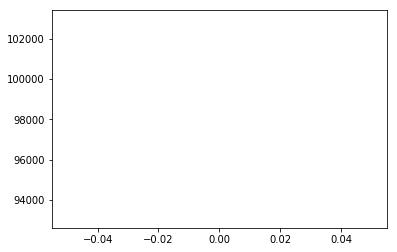

In [87]:
plt.plot(np.std(cA2))

In [180]:
#w = v.reshape(cA2[0].shape + (2,))
approx_real = cA2a.real
approx_imag = cA2a.imag

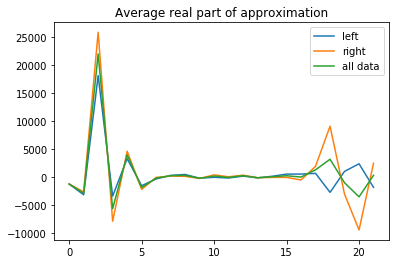

In [191]:
plt.plot(approx_real[df.label=='left'].mean(axis=0), label="left")
plt.plot(approx_real[df.label=='right'].mean(axis=0), label="right")
plt.plot(approx_real.mean(axis=0), label="all data")
plt.legend()
plt.title("Average real part of approximation")
plt.show()

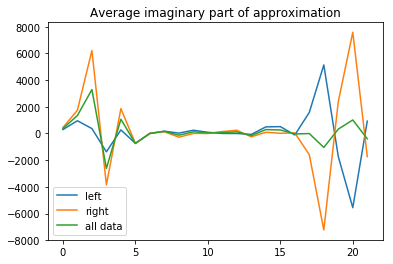

In [190]:
plt.plot(approx_imag[df.label=='left'].mean(axis=0), label="left")
plt.plot(approx_imag[df.label=='right'].mean(axis=0), label="right")
plt.plot(approx_imag.mean(axis=0), label="all data")
plt.legend()
plt.title("Average imaginary part of approximation")
plt.show()

In [220]:
approx_imag.shape

(150, 22)

In [246]:
approx_imag2 = approx_imag
approx_imag2 = np.append(approx_imag2,df.label, axis=1)
print (approx_imag2.shape)
print (df.label.shape)
#test = np.zeros([150,23])
approx_imag2.shape

ValueError: all the input arrays must have same number of dimensions

In [239]:
test.shape

(150, 22)